In [64]:
!pip install missingno
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as mano
import numpy as np
from scipy.stats import skew, kurtosis, spearmanr as spm, pearsonr as pe
from sklearn.impute import KNNImputer, SimpleImputer
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import OrdinalEncoder as ordenc, OneHotEncoder as ohot
from sklearn.metrics import confusion_matrix as confm, accuracy_score as acs, classification_report as crep, log_loss as logloss, mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as r2 
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc, DecisionTreeRegressor as dtr
from sklearn.linear_model import LinearRegression as LR

SyntaxError: invalid syntax (<ipython-input-64-23afaa5f1dbc>, line 14)

# Function 1

In [37]:
def loadfile():
    filetype = str(input("What is the file type? (csv or excel)\n"))
    if filetype == 'csv':
        filepath = str(input("What is the filepath:"))
        data = pd.read_csv(filepath, index_col = None, encoding = 'unicode_escape')
        return data.head(10)
    elif filetype == 'excel':
        filepath = str(input("What is the filepath:"))
        data = pd.read_excel(filepath, index_col = None, encoding = 'unicode_escape')
        return data.head(10)
    else:
        return None
data = loadfile()

What is the file type? (csv or excel)
csv
What is the filepath:House.Price.csv


# Function 2

In [38]:
def description(name, rows):
    print("The columns and rows of the dataset are", name.shape)
    print("The number of values in the dataset is", name.size)
    print(name.head(rows))
    print(name.tail(rows))
    print(name.dtypes)
    print(name.columns)
    return name.describe()
description(data, 15)

The columns and rows of the dataset are (10, 81)
The number of values in the dataset is 810
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    A

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,10.00000,10.000000,9.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.00000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000
mean,5.50000,64.000000,68.666667,10123.100000,6.70000,5.500000,1973.500000,1982.400000,113.400000,685.200000,...,111.000000,51.700000,70.50000,32.000000,0.0,0.0,105.000000,6.400000,2007.800000,190140.000000
std,3.02765,47.422451,13.322913,2605.988166,1.05935,0.971825,33.440661,21.526211,129.426255,386.418541,...,121.293034,60.385889,114.64462,101.192885,0.0,0.0,236.231995,4.087923,0.918937,60028.293329
min,1.00000,20.000000,50.000000,6120.000000,5.00000,5.000000,1915.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,1.000000,2006.000000,118000.000000
25%,3.25000,50.000000,60.000000,8725.000000,6.25000,5.000000,1947.500000,1970.750000,0.000000,528.250000,...,0.000000,10.500000,0.00000,0.000000,0.0,0.0,0.000000,2.500000,2007.250000,140750.000000
50%,5.50000,60.000000,68.000000,9842.000000,7.00000,5.000000,1984.500000,1985.500000,81.000000,719.000000,...,65.000000,38.500000,0.00000,0.000000,0.0,0.0,0.000000,6.500000,2008.000000,190750.000000
75%,7.75000,60.000000,80.000000,11033.000000,7.00000,5.750000,2000.750000,2001.500000,193.500000,857.000000,...,224.250000,60.000000,153.75000,0.000000,0.0,0.0,0.000000,9.750000,2008.000000,219750.000000
max,10.00000,190.000000,85.000000,14260.000000,8.00000,8.000000,2004.000000,2005.000000,350.000000,1369.000000,...,298.000000,204.000000,272.00000,320.000000,0.0,0.0,700.000000,12.000000,2009.000000,307000.000000


# Function 3

In [4]:
def remcol(dataset):
    colname = str(input("which column do you want to remove?\n"))
    if colname != "":
        del(dataset[colname])
        return remcol(dataset)
    else:
        return
remcol(data)

which column do you want to remove?
LotArea
which column do you want to remove?



# Function 4

In [47]:
def remrow(dataset):
    colname = str(input("which column values do you want to remove?\n"))
    if colname == 'all':
        remrow.dataset = dataset.dropna(axis=0)
    elif colname !="":
        row = (input("which row/s do you want to remove?\n"))
        remrow.dataset = dataset[dataset[colname]!=row]
        return remrow(dataset)
    else:
        return remrow.dataset
remrow(data)
newdata = remrow.dataset
#renaming the dataset here, since the filtered dataset will only exist
#as an attribute of the function

which column values do you want to remove?
all


# Function 5

In [48]:
def nullvalues(dataset):    
    return dataset.isnull().sum()
nullvalues(newdata)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Function 6

What analysis do you want to do? (missingval, totalmissingval, or correlation)corr


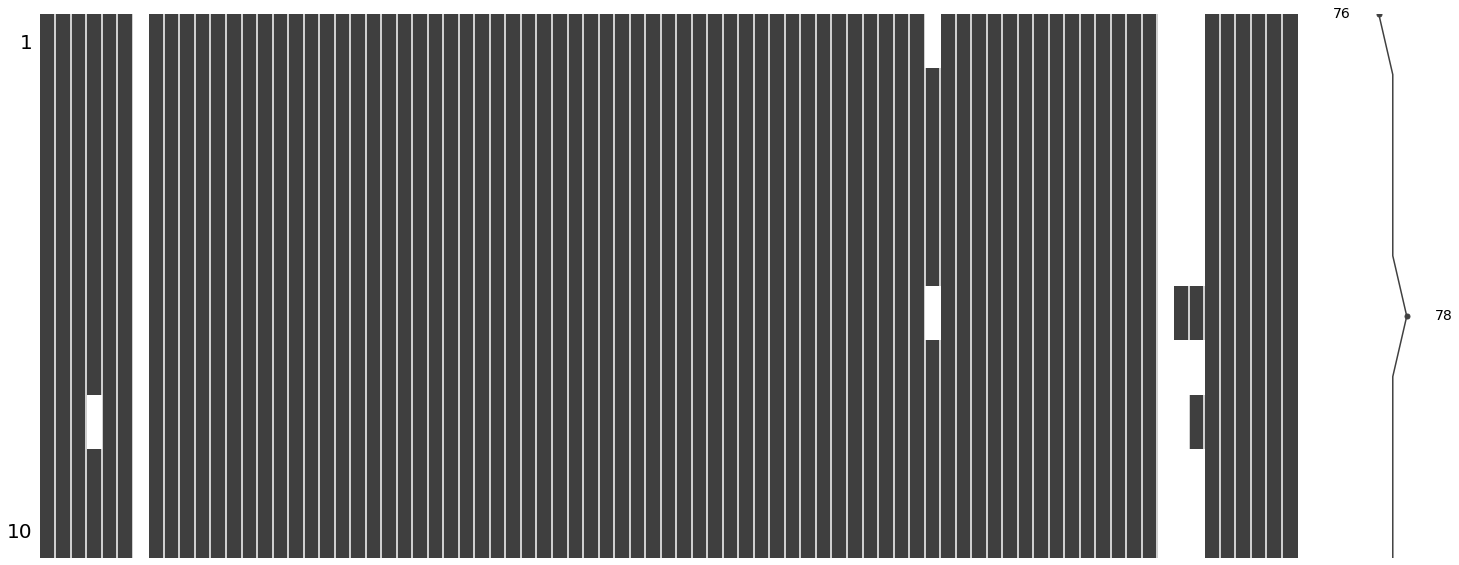

In [45]:
def missval(dataset):
    x = str(input("What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)"))
    if x == 'missingval' or 'missinval':
        return mano.matrix(dataset)
    elif x == 'totalmissingval' or 'totalmissinval':
        return mano.bar(dataset)
    elif x == 'correlation' or 'corr':
        return mano.heatmap(dataset, figsize=(12,6))
    elif x == 'dendo' or 'dendogram':
        return mano.dendrogram(dataset)
missval(data)

# Function 7

In [ ]:
def fillmissingvals(dataset):
    method = str(input("which method do you want to use? (KNN, SimpleImp, Interpolation, mean, median, mode)"))
    colname = str(input("which column do you want to fill?"))
    if method == 'mode':
        dataset[colname].value_counts()
        mode = input("what is the most occurring value?")
        dataset[colname].fillna(mode, inplace=True)
    elif method == 'mean':
        dataset[colname].fillna(data[colname].mean)
    elif method == 'median':
        dataset[colname].fillna(data[colname].median)
    elif method == 'knn' or 'KNN' or 'Knn':
        neighbours = int(input("how many neighbours?\n"))
        newcolname = str(input("what is the new column name?\n"))
        imputer = KNNImputer (n_neighbors=neighbours)
        dataset[newcolname] = imputer.fit_transform(dataset[newcolname])
    elif method == 'simpleimp' or 'SimpleImp' or 'SimpleImputer' or 'simpleimputer':
        newcolname = str(input("what is the new column name?\n"))
        dataset[[newcolname]] = mean_imputation.fit_transform(dataset[[newcolname]])
    elif method == 'Interpol' or 'Interp' or 'Interpolate' or 'interp' or 'interpol' or 'interpolate':
        submethod = str(input("backwards or forwards?"))
        newcolname = str(input("what is the new column name?\n"))
        if submethod == 'forwards' or 'forward':
            dataset[newcolname] = dataset[colname].interpolate(method ='linear', limit_direction ='forward')
        elif submethod == 'backwards' or 'backward':
            dataset[newcolname] = dataset[colname].interpolate(method ='linear', limit_direction ='backward')

# Function 8

which column do you want to analyze? Press enter if you want to analyze the entire dataset. MSSubClass
What analysis do you want to do? (qqplot, histogram, describe, plot, boxplot, skew, kurtosis)skew


<AxesSubplot:>

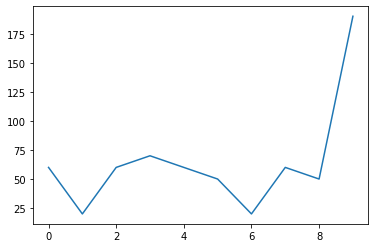

In [55]:
def cat_analysis(dataset):
    colname = str(input("which column do you want to analyze? Press enter if you want to analyze the entire dataset. "))
    analysis_type = str(input("What analysis do you want to do? (qqplot, histogram, describe, plot, boxplot, skew, kurtosis)"))
    if analysis_type == 'line' or 'plot':
        if colname != '':
            return dataset[colname].plot()
        else:
            return dataset.plot()
    elif analysis_type == 'describe':
        if colname != '':
            return dataset[colname].describe()
        else:
            return dataset.describe()
    elif analysis_type == 'qqplot':
        fit = str(input("what type of fit do you want the qqplot to be? (None, 45, s, r, or q)\n"))
        if colname != '':
            return sm.qqplot(dataset[colname], line = fit)
        else:
            return sm.qqplot(dataset, line = fit)
    elif analysis_type == 'histogram':
        if colname != '':
            return plt.hist(dataset[colname])
        else:
            return plt.hist(dataset)
    elif analysis_type == 'boxplot' or 'box plot' or 'box':
        if colname != '':
            return dataset[colname].plot.box()
        else:
            return dataset.plot.box()
    elif analysis_type == 'skew':
        if colname != '':
            skewvalue = skew(dataset[colname])
            print(skewvalue)
            if skewvalue>-2 and skewvalue<2:
                print("Normally skewed data")
            else:
                print("Not normally skewed data")
        else:
            skewvalue = skew(dataset)
            print(skewvalue)
            if skewvalue>-2 and skewvalue<2:
                print("Normally skewed data")
            else:
                print("Not normally skewed data")
    elif analysis_type == 'kurtosis':
        if colname != '':
            kurtosis_value = kurtosis(dataset[colname])
            print(kurtosis_value)
            if kurtosis_value>-7 and kurtosis_value<7:
                print("Normal Kurtosis")
            else:
                print("Not normal Kurtosis")
        else:
            kurtosis_value = kurtosis(dataset)
            print(kurtosis_value)
            if kurtosis_value>-7 and kurtosis_value<7:
                print("Normal Kurtosis")
            else:
                print("Not normal Kurtosis")
    else:
        print("Invalid Command")
        return cat_analysis(dataset)
cat_analysis(data)

# Function 9

In [ ]:
def numanalysis(dataset):
    colname = str(input("which column do you want to analyze? Press enter if you want to analyze the entire dataset. "))
    analysis_type = str(input("What analysis do you want to do? (bar charts, value counts?(barchart, value counts))"))
    if analysis_type == 'value counts' or 'valuecounts' or 'value count' or 'valuecount':
        if colname != '':
            return dataset[colname].value_counts()
        else:
            return dataset.value_counts()
    elif analysis_type == 'bar chart' or 'barchart' or 'bar charts' or 'barcharts':
        if colname != '':
            return dataset[colname].plot.bar()
        else:
            return dataset[colname].plot.bar()
numanalysis(data)

# Function 10

In [ ]:
def changedtype(dataset):
    colname = str(input("which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. "))
    if colname != '':
        changetype = str(input("what data type do you want to set the column to? (string, numbers, datetime)"))
        if changetype == 'string':
            dataset[colname].astype(str)
        elif changetype == 'numbers' or 'numeric' or 'integers' or 'integer':
            dataset[colname].astype(float) #converting to float to accomodate all types of numbers
        elif changetype == 'boolean' or 'True/False':
            dataset[colname].astype(bool)
        elif changetype == 'datetime' or 'date' or 'time':
            pd.to_datetime(dataset[colname])
    else:
        changetype = str(input("what data type do you want to set the column to? (string, numbers, datetime)"))
        if changetype == 'string':
            dataset.astype(str)
        elif changetype == 'numbers' or 'numeric' or 'integers' or 'integer':
            dataset.astype(float) #converting to float to accomodate all types of numbers
        elif changetype == 'boolean' or 'True/False':
            dataset.astype(bool)
        elif changetype == 'datetime' or 'date' or 'time':
            pd.to_datetime(dataset)
chngdata = changedtype(data)

# Function 11

In [ ]:
def rename(dataset):
    colname = str(input("Which column do you want to rename?\n"))
    newcolname = str(input("New name of the column?\n"))
    dataset.rename(columns = {colname:newcolname}, inplace = True)
    return rename(dataset)
def remspace(dataset):
    colname=str(input("Which column do you want to remove white space in?\n"))
    where = str(input("where do you want to remove the whitespace from?"))
    if colname == "":
        if where == "":
            dataset.columns = dataset.columns.str.replace(' ', '')
        if where == "beginning":
            dataset.columns = dataset.columns.str.lstrip()
        if where == "end":
            dataset.columns = dataset.columns.str.rstrip()
        if where == "both":
            dataset.columns = dataset.columns.str.strip()
    else:
        if where == "":
            dataset[colname].columns = dataset[colname].columns.str.replace(' ', '')
        if where == "beginning":
            dataset[colname].columns = dataset[colname].columns.str.lstrip()
        if where == "end":
            dataset[colname].columns = dataset[colname].columns.str.rstrip()
        if where == "both":
            dataset[colname].columns = dataset[colname].columns.str.strip()
    
def repspace(dataset):
    colname=str(input("Which column do you want to replace white space in?\n"))
    newvalue = str(input("what do you want to replace the white space with?"))
    where = str(input("where do you want to put the new value?"))
    if colname !="":
        if where == "beginning":
            dataset[colname].str.replace('^ +', newvalue)
        elif where == "end":
            dataset[colname].str.replace(' +$', newvalue)
        elif where == "both":
            dataset[colname].str.replace('^ +| +$', newvalue)
        elif where == "":
            dataset[colname].str.replace(' ', newvalue)
    else:
        if where == "beginning":
            dataset.str.replace('^ +', newvalue)
        elif where == "end":
            dataset.str.replace(' +$', newvalue)
        elif where == "both":
            dataset.str.replace('^ +| +$', newvalue)
        elif where == "":
            dataset.str.replace(' ', newvalue)
        
rename(data)

# Function 12

In [56]:
def extdmy(dataset):
    colname = str(input("Which column do you want to extract from?\n"))
    dataset['year'] = pd.DatetimeIndex(df[colname]).year
    dataset['month'] = pd.DatetimeIndex(df[colname]).month

# Function 13

In [ ]:
def deepcopy(dataset):
    return dataset.copy()
copydata = deepcopy(data)

# Function 14

In [57]:
def encoding(dataset):
    print(dataset.dtypes)
    method = str(input("what do you want to do?"))
    if method == "label":
        colname = str(input("which column do you want to encode?"))
        dataset[colname] = dataset[colname].astype('category')
        newcolname = str(input("set a new column name for encoded values"))
        dataset[newcolname] = dataset[colname].cat.codes
    elif method == "onehot":
        colname = str(input("which column do you want to encode?"))
        results = ohot.fit_transform(dataset[colname])
        newdat = pd.DataFrame(results.toarray(), columns = ohot.categories_)
        dataset = dataset.join(newdat)
    elif method == "ordinal" or "ord":
        colname = str(input("which column do you want to encode?"))
        newcolname = str(input("set a new column name for encoded values"))
        dataset[colname] = ordenc.fit_transform(dataset[newcolname])

# Function 15

In [59]:
def splitting(dataset):
    x = int(input("which column do the predictors begin from?"))
    y = int(input("which column do the predictors end on?"))
    z = int(input("which column is the label?"))
    predictors = dataset.values(:, x:y)
    label = dataset.values(:, z)
    algorithm = str(input("which algorithm do you want to apply?\n"))
    if algorithm == "decision tree" or "decisiontree":
        task = str(input("which task do you want to perform?\n"))
        if task == "classification":
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
            clf_entropy = dtc(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
            clf_entropy.fit(X_train, y_train)
            print(clf_entropy)
            y_pred = clf_object_predict(X-test)
            print("These are the predicted values: ", y_pred)
            print("The Confusion Matrix is", confm(y_test, y_pred))
            print("The Accuracy Score is", acs(y_test, y_pred)*100)
            print("The Classification Report is", crep(y_test, y_pred))
            print("The LogLoss is", logloss(y_test, y_pred))
            fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
            print("The Area Under the Curve is",metrics.auc(fpr, tpr))
        elif task == "regression":
            colname1 = str(input("first column you want to relate"))
            colname2 = str(input("second column you want to relate"))
            regr_1 = dtr(max_depth=2)
            regr_2 = dtr(max_depth=5)
            regr_1.fit(dataset[colname1], dataset[colname2])
            regr_2.fit(dataset[colname1], dataset[colname2])
            X_test = (Y)
            y_1 = regr_1.predict(X_test)
            y_2 = regr_2.predict(X_test)
            print("mean absolute error is",MAE(y_1, y_2))
            print("mean squared error is", MSE(y_1, y_2))
            print("r2 score is", r2(y_1, y_2))
            model = LR()
            m,n = colname1, colname2
            model.fit(colname1, colname2)
            return (1 - (1-model.score(colname1, colname2))*(len(n)-1)/(len(n)-m.shape[1]-1))

[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000]


In [ ]:
logloss(data['MSSubClass'], data[''])

# Function 16

In [ ]:
def ANOVA(dataset):
    colname1 = str(input("first column you want to relate"))
    colname2 = str(input("second column you want to relate"))
    covariance = np.cov(colname1, colname2)
    print("The Covariance is ",covariance)
    corr1, _ = sp(dataset[colname1], dataset[colname2])
    print('Spearman correlation: %.2f' % corr)
    corr2, _ = pe(dataset[colname1], dataset[colname2])
    print('Pearsons correlation: %.2f' % corr)
    print('The t-test value is')
    return ((dataset[colname1].mean()-dataset[colname2].mean())/(math.sqrt((dataset[colname1].std()**2)/dataset[colname1].count() + (dataset[colname2].std()**2)/dataset[colname2].count()))

# Function 17

Heatmap colour?
rainbow
which column do you want to analyze?
MSSubClass


ValueError: Must pass 2-d input. shape=()

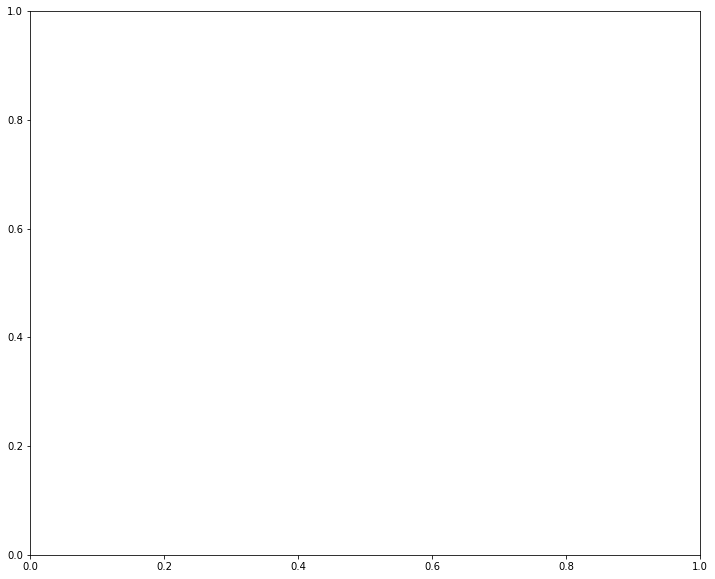

In [52]:
def corrheatmap(dataset):
    corrmatrix = dataset.corr()
    numofrows = len(dataset.columns)
    colour = str(input("Heatmap colour?\n"))
    colname = str(input("which column do you want to analyze?\n"))
    if colname != '':
        cols = corrmatrix.nlargest(numofrows, colname)[colname].index 

        coeffs = np.corrcoef(dataset[colname].values.T) 
        f, axis = plt.subplots(figsize =(12, 10)) 

        return sb.heatmap(coeffs, ax = axis, cmap = colour, 
                    linewidths = 0.2, yticklabels = cols.values,  
                                      xticklabels = cols.values) 
    else:
        corrmatrix = dataset.corr()
        f, axis = plt.subplots(figsize =(12, 10)) 
        sb.heatmap(corrmatrix, ax = axis, cmap = colour, linewidths = 0.2)
def clheatmap(dataset):
    corrmatrix = dataset.corr()
    colour = str(input("Heatmap colour?\n"))
    clmap = sb.clustermap(corrmatrix, cmap = colour, linewidths = 0.2); 
    f, axis = plt.subplots(figsize =(15, 10)) 
    plt.setp(clmap.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
    return clmap
corrheatmap(data)

# Function 18

In [ ]:
def scatter(dataset):
    ind = str(input("X-axis Value: "))
    dep = str(input("Y-axis Value: "))
    return dataset.plot.scatter(x = ind, y = dep,colormap='viridis')
scatter(data)

<AxesSubplot:>

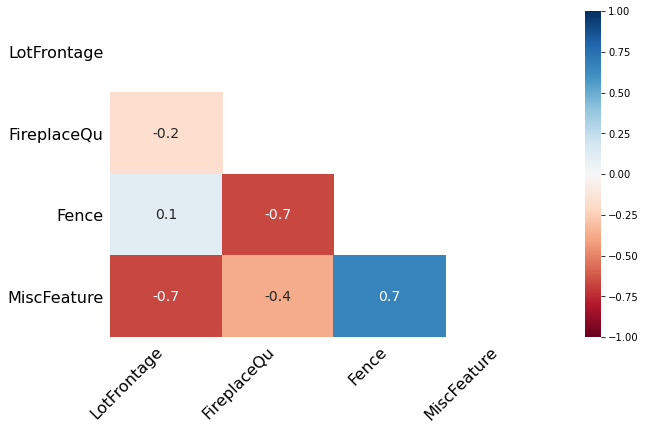

In [26]:
mano.heatmap(data, figsize=(10,6))